In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files

# Upload a file and store the uploaded file in a dictionary
uploaded = files.upload()

Saving Capstone_final.csv to Capstone_final.csv


In [ ]:
import pandas as pd

# Load the uploaded CSV into a DataFrame
data = pd.read_csv('Capstone_final.csv')

# Check the first few rows
data.head()



,CH_REGION,ID,Chapter,FullName,MemberType,Gender,Status,StateProvince,PaidThrough,JoinDate,Amount,DOB,IN_INITIATION_DATE,IN_WITHDRAWAL_DATE
0,EA,100007,NaN,Ellen F Fisher,XMAL,F,X,MD,6/30/2003 0:00,4/24/2006,512,9/23/1999,2/14/2022,6/8/2023
1,EA,100008,NaN,Catherine W Greene,MTRA,F,A,MD,6/30/2003 0:00,5/10/2011,865,9/2/2001,12/23/2022,4/15/2024
2,EA,100009,NaN,Nahketah G Johnson,XALU,Unknown,X,MD,6/30/2014 0:00,8/20/2003,255,10/21/1989,11/20/2011,1/29/2018
3,SO,100011,NaN,Kay L Davis,NNON,M,N,DC,6/30/2003 0:00,11/19/2001,308,11/16/2002,3/13/2021,8/31/2023
4,EA,100012,NaN,Delois C Latimore,MTRA,F,A,MD,6/30/2003 0:00,10/2/2004,774,2/17/1983,3/4/2008,NaN


In [ ]:
# Display the first few rows
data.head()

,CH_REGION,ID,Chapter,FullName,MemberType,Gender,Status,StateProvince,PaidThrough,JoinDate,Amount,DOB,IN_INITIATION_DATE,IN_WITHDRAWAL_DATE
0,EA,100007,NaN,Ellen F Fisher,XMAL,F,X,MD,6/30/2003 0:00,4/24/2006,512,9/23/1999,2/14/2022,6/8/2023
1,EA,100008,NaN,Catherine W Greene,MTRA,F,A,MD,6/30/2003 0:00,5/10/2011,865,9/2/2001,12/23/2022,4/15/2024
2,EA,100009,NaN,Nahketah G Johnson,XALU,Unknown,X,MD,6/30/2014 0:00,8/20/2003,255,10/21/1989,11/20/2011,1/29/2018
3,SO,100011,NaN,Kay L Davis,NNON,M,N,DC,6/30/2003 0:00,11/19/2001,308,11/16/2002,3/13/2021,8/31/2023
4,EA,100012,NaN,Delois C Latimore,MTRA,F,A,MD,6/30/2003 0:00,10/2/2004,774,2/17/1983,3/4/2008,NaN


In [ ]:
# Check for missing values
print(data.isnull().sum())



# Convert date columns to datetime format
data['JoinDate'] = pd.to_datetime(data['JoinDate'], errors='coerce')
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
data['IN_INITIATION_DATE'] = pd.to_datetime(data['IN_INITIATION_DATE'], errors='coerce')
data['IN_WITHDRAWAL_DATE'] = pd.to_datetime(data['IN_WITHDRAWAL_DATE'], errors='coerce')



# Calculate Membership Duration in years
data['MembershipDuration'] = (data['IN_WITHDRAWAL_DATE'] - data['JoinDate']).dt.days / 365.25

# Fill or drop missing values as necessary
data.fillna(method='ffill', inplace=True)  # Forward fill for example


CH_REGION                0
ID                       0
Chapter               5499
FullName                 0
MemberType               0
Gender                   0
Status                   0
StateProvince            8
PaidThrough           1550
JoinDate                 0
Amount                   0
DOB                      0
IN_INITIATION_DATE       0
IN_WITHDRAWAL_DATE    2717
dtype: int64


<ipython-input-8-f5528ff632b3>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill for example


In [ ]:
data.head()

,CH_REGION,ID,Chapter,FullName,MemberType,Gender,Status,StateProvince,PaidThrough,JoinDate,Amount,DOB,IN_INITIATION_DATE,IN_WITHDRAWAL_DATE,MembershipDuration
0,EA,100007,NaN,Ellen F Fisher,XMAL,F,X,MD,6/30/2003 0:00,2006-04-24,512,1999-09-23,2022-02-14,2023-06-08,17.122519
1,EA,100008,NaN,Catherine W Greene,MTRA,F,A,MD,6/30/2003 0:00,2011-05-10,865,2001-09-02,2022-12-23,2024-04-15,12.933607
2,EA,100009,NaN,Nahketah G Johnson,XALU,Unknown,X,MD,6/30/2014 0:00,2003-08-20,255,1989-10-21,2011-11-20,2018-01-29,14.444901
3,SO,100011,NaN,Kay L Davis,NNON,M,N,DC,6/30/2003 0:00,2001-11-19,308,2002-11-16,2021-03-13,2023-08-31,21.779603
4,EA,100012,NaN,Delois C Latimore,MTRA,F,A,MD,6/30/2003 0:00,2004-10-02,774,1983-02-17,2008-03-04,2023-08-31,21.779603


In [ ]:
data.tail()

,CH_REGION,ID,Chapter,FullName,MemberType,Gender,Status,StateProvince,PaidThrough,JoinDate,Amount,DOB,IN_INITIATION_DATE,IN_WITHDRAWAL_DATE,MembershipDuration
5494,SW,110741,NaN,Glenda L Jones,MTRA,F,A,TX,12/31/2024 0:00,2022-05-04,541,1999-03-30,2019-12-30,2019-01-06,12.818617
5495,EA,103087,NaN,Elizabeth Eubanks,XMAL,F,X,NC,6/30/1985 0:00,2003-09-17,393,2000-05-24,2020-03-19,2023-10-17,20.082136
5496,SA,103091,NaN,Harriett N. Haith,XALU,F,X,NC,6/30/2012 0:00,2008-03-15,537,1995-11-05,2016-12-02,2023-10-17,20.082136
5497,SA,103093,NaN,Ollie M Reynolds,MTRA,Unknown,A,PA,6/30/1988 0:00,2010-08-28,396,2004-12-11,2023-10-15,2023-10-17,20.082136
5498,SA,103094,NaN,Orine B Wiggins,MTRA,Unknown,A,NC,6/30/1990 0:00,2011-05-15,704,1998-07-28,2020-06-07,2022-07-25,11.195072


In [ ]:
# Display summary statistics
data.describe()


,ID,Chapter,JoinDate,Amount,DOB,IN_INITIATION_DATE,IN_WITHDRAWAL_DATE,MembershipDuration
count,5499.000000,0.0,5499,5499.000000,5499,5499,5499,5499.000000
mean,103719.225496,NaN,2012-01-09 16:24:36.923077120,504.570467,1992-11-01 05:46:42.618657920,2017-10-27 22:59:14.828150528,2022-01-13 14:50:04.909983488,9.866585
min,100001.000000,NaN,2000-01-02 00:00:00,1.000000,1980-01-04 00:00:00,1998-05-06 00:00:00,2001-06-04 00:00:00,-17.541410
25%,101377.500000,NaN,2006-01-29 00:00:00,259.000000,1986-04-17 00:00:00,2014-03-17 12:00:00,2020-10-10 12:00:00,3.802875
50%,102875.000000,NaN,2012-01-19 00:00:00,507.000000,1992-10-03 00:00:00,2019-06-30 00:00:00,2023-06-24 00:00:00,10.012320
75%,105500.000000,NaN,2018-01-27 00:00:00,754.000000,1999-04-09 12:00:00,2022-10-08 00:00:00,2024-08-21 00:00:00,16.406571
max,110741.000000,NaN,2023-12-27 00:00:00,1000.000000,2005-12-29 00:00:00,2024-10-28 00:00:00,2025-10-28 00:00:00,25.634497
std,2892.611905,NaN,NaN,286.710752,NaN,NaN,NaN,8.072710


In [ ]:
import pandas as pd
from datetime import datetime

# Convert DOB to datetime format
data['DOB'] = pd.to_datetime(data['DOB'])

# Calculate the age
today = datetime.today()
data['Age'] = data['DOB'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)))

data.head()

,CH_REGION,ID,Chapter,FullName,MemberType,Gender,Status,StateProvince,PaidThrough,JoinDate,Amount,DOB,IN_INITIATION_DATE,IN_WITHDRAWAL_DATE,MembershipDuration,Age
0,EA,100007,NaN,Ellen F Fisher,XMAL,F,X,MD,6/30/2003 0:00,2006-04-24,512,1999-09-23,2022-02-14,2023-06-08,17.122519,25
1,EA,100008,NaN,Catherine W Greene,MTRA,F,A,MD,6/30/2003 0:00,2011-05-10,865,2001-09-02,2022-12-23,2024-04-15,12.933607,23
2,EA,100009,NaN,Nahketah G Johnson,XALU,Unknown,X,MD,6/30/2014 0:00,2003-08-20,255,1989-10-21,2011-11-20,2018-01-29,14.444901,35
3,SO,100011,NaN,Kay L Davis,NNON,M,N,DC,6/30/2003 0:00,2001-11-19,308,2002-11-16,2021-03-13,2023-08-31,21.779603,22
4,EA,100012,NaN,Delois C Latimore,MTRA,F,A,MD,6/30/2003 0:00,2004-10-02,774,1983-02-17,2008-03-04,2023-08-31,21.779603,41


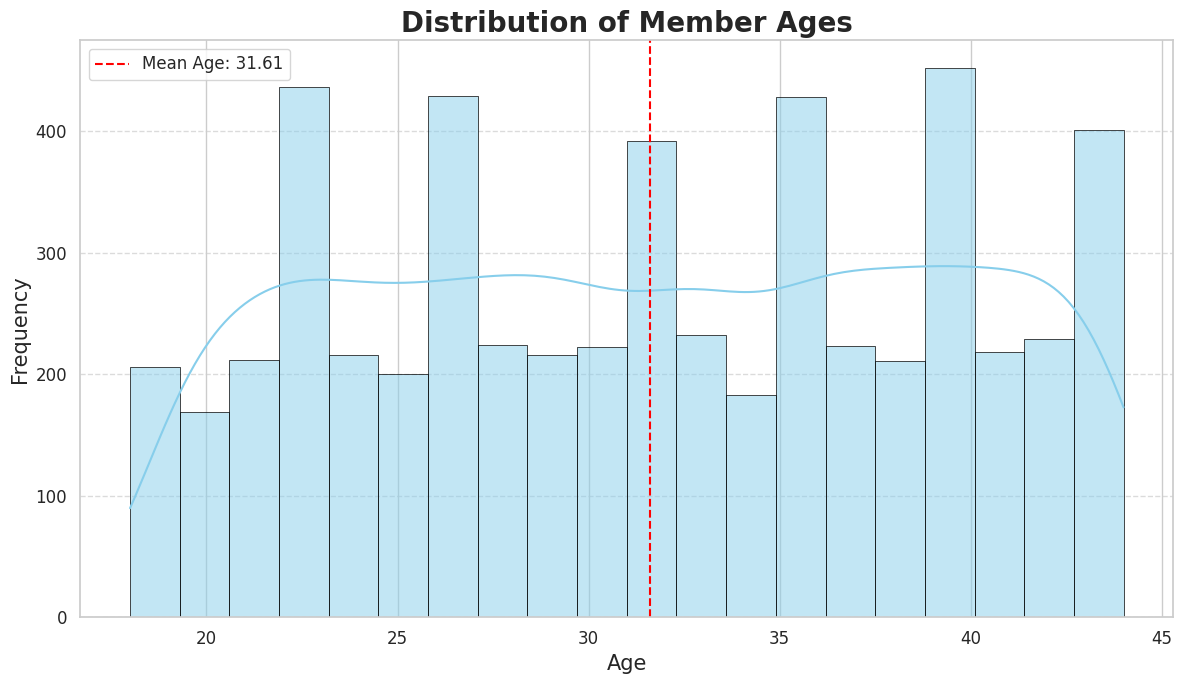

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Create the figure and axes
plt.figure(figsize=(12, 7))

# Create the histogram with KDE
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue', edgecolor='black', linewidth=0.5)

# Set the title and labels with a larger font size
plt.title('Distribution of Member Ages', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a text annotation for the mean age (optional)
mean_age = data['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean Age: {mean_age:.2f}')
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-14-7edf6d50023a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='MemberType', palette='Set2')


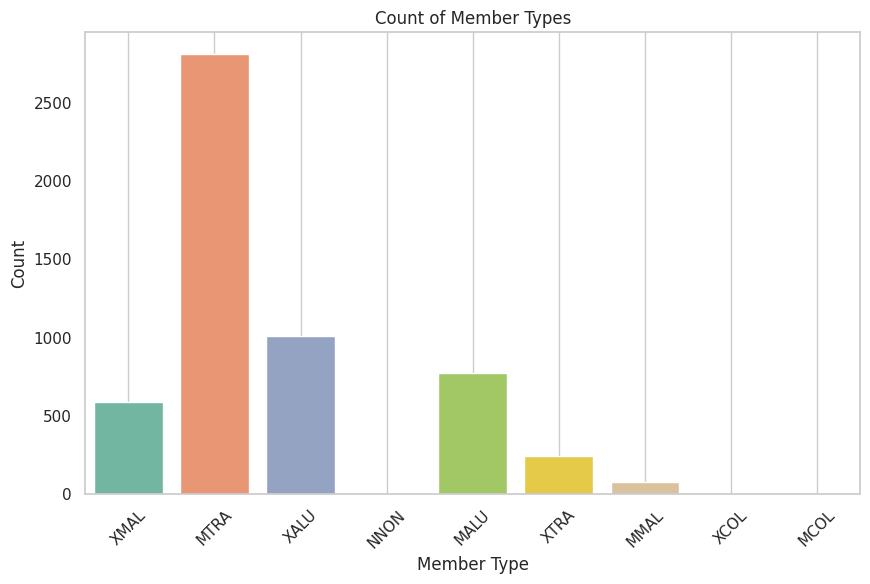

In [ ]:
# Count the number of each Member Type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MemberType', palette='Set2')
plt.title('Count of Member Types')
plt.xlabel('Member Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()


<ipython-input-15-fd17be1fcc27>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Status', palette='pastel')


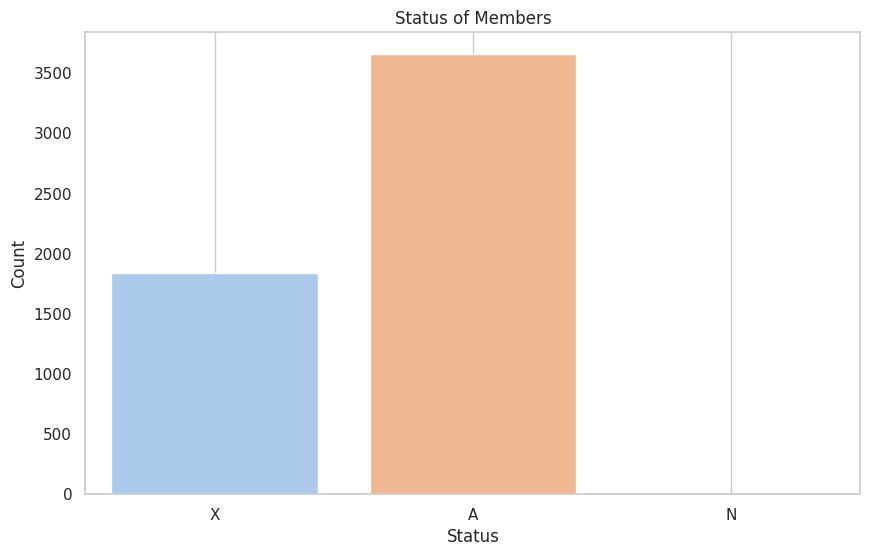

In [ ]:
# Plot the status of members
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Status', palette='pastel')
plt.title('Status of Members')
plt.xlabel('Status')
plt.ylabel('Count')
plt.grid()
plt.show()


<ipython-input-16-9aeb6707fe5a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data, x='Status', y='Age', palette='coolwarm', linewidth=1.5)


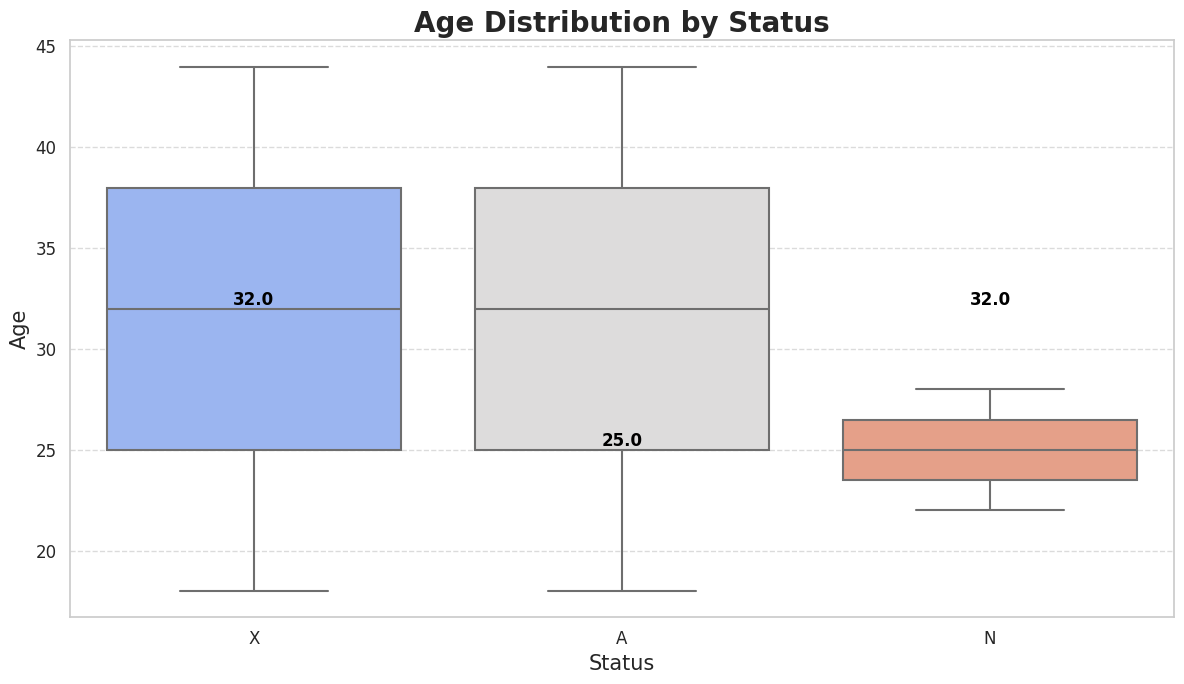

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Create the figure
plt.figure(figsize=(12, 7))

# Create the box plot
ax = sns.boxplot(data=data, x='Status', y='Age', palette='coolwarm', linewidth=1.5)

# Set the title and labels with a larger font size
plt.title('Age Distribution by Status', fontsize=20, fontweight='bold')
plt.xlabel('Status', fontsize=15)
plt.ylabel('Age', fontsize=15)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the median age for each status (optional)
medians = data.groupby('Status')['Age'].median()
for x, median in enumerate(medians):
    ax.text(x, median, f'{median:.1f}', horizontalalignment='center',
            size=12, color='black', weight='bold', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


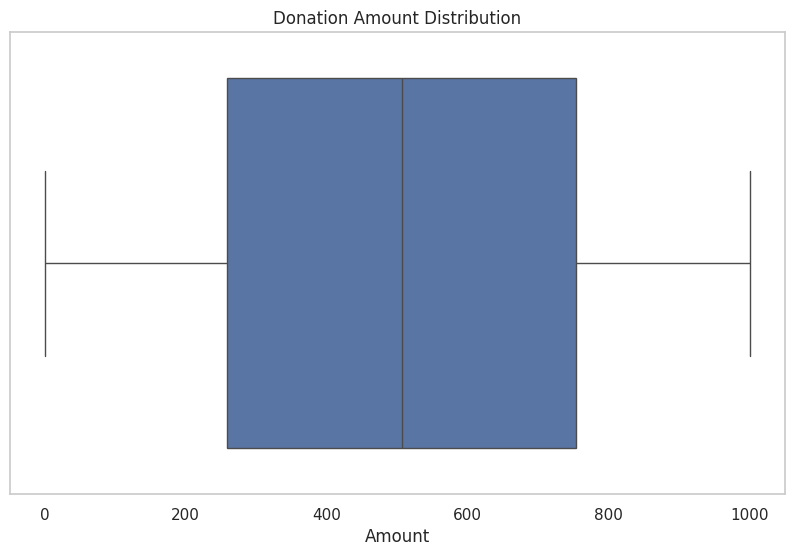

In [ ]:
# Create a box plot for Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Amount'])
plt.title('Donation Amount Distribution')
plt.xlabel('Amount')
plt.grid(axis='x')
plt.show()


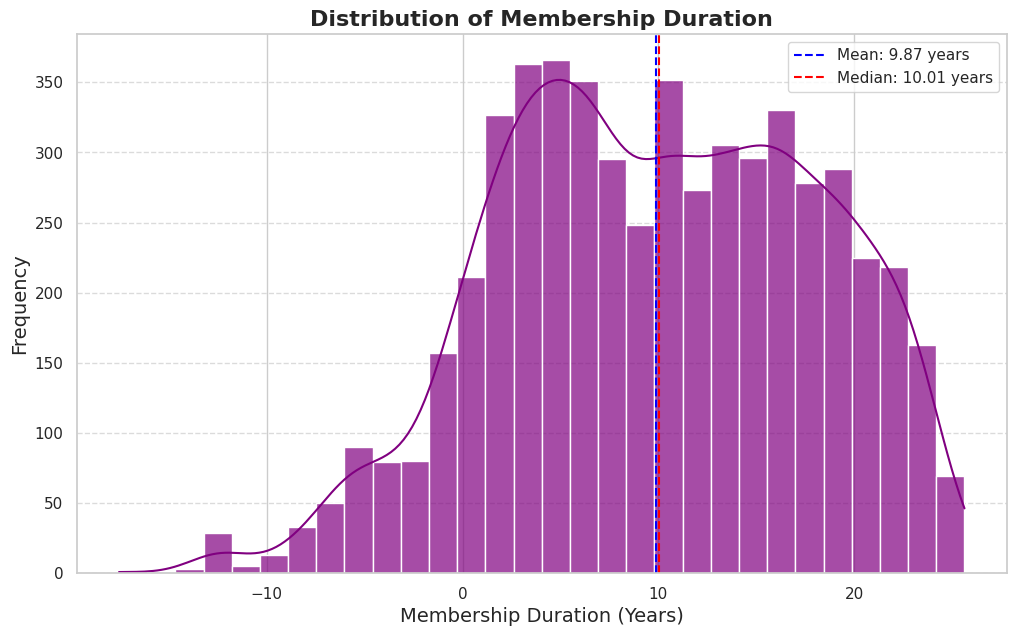

In [ ]:
# Set a more sophisticated style for the plots
sns.set(style="whitegrid")

# Create a histogram for Membership Duration with enhancements
plt.figure(figsize=(12, 7))

# Use histplot with more options for better aesthetics
sns.histplot(data['MembershipDuration'], bins=30, kde=True, color='purple', alpha=0.7)

# Adding annotations
plt.title('Distribution of Membership Duration', fontsize=16, fontweight='bold')
plt.xlabel('Membership Duration (Years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add vertical lines for mean and median
mean_duration = data['MembershipDuration'].mean()
median_duration = data['MembershipDuration'].median()

plt.axvline(mean_duration, color='blue', linestyle='--', label=f'Mean: {mean_duration:.2f} years')
plt.axvline(median_duration, color='red', linestyle='--', label=f'Median: {median_duration:.2f} years')

# Add legend
plt.legend()

# Improve the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



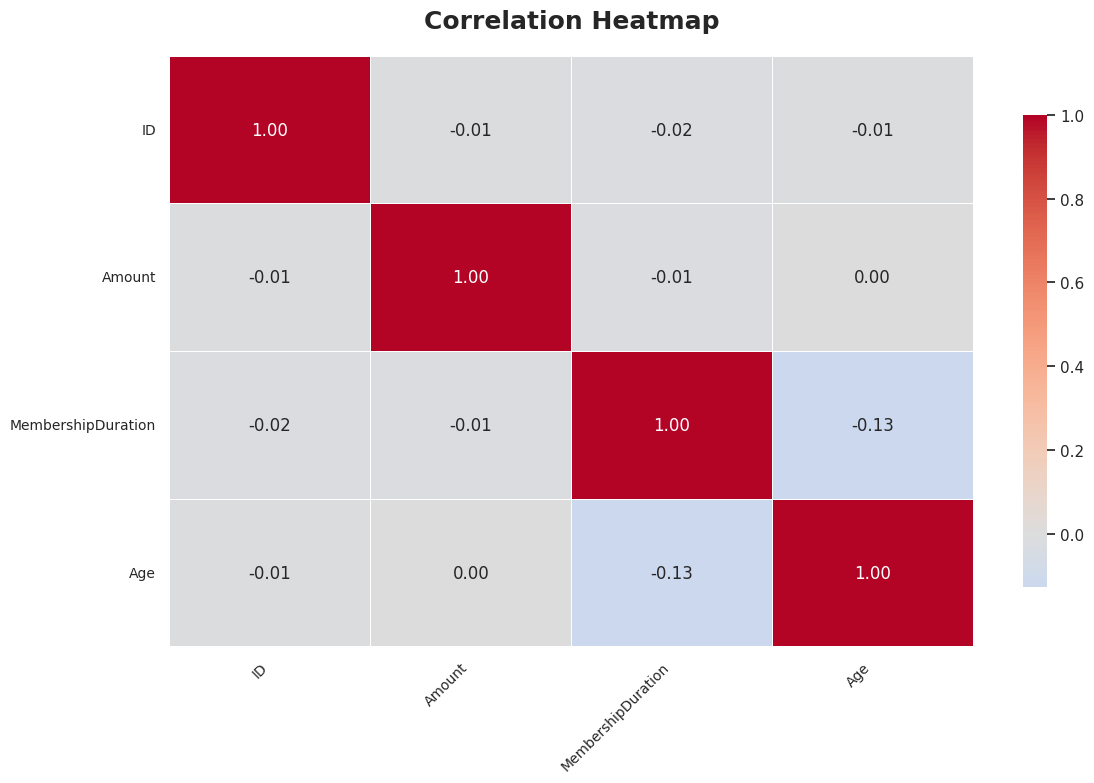

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'Chapter' column if it's unnecessary
numeric_data = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Chapter'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set the style
sns.set_theme(style='white')

# Create the figure
plt.figure(figsize=(12, 8))

# Create the heatmap with additional styling
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Set the title and adjust layout
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


Feedback Column

In [ ]:
import pandas as pd
import random

feedback_reasons = [
    "Bad Membership Intake Experience", "Bad Sorority Membership Experience", "Financial Issues",
    "Lack of Engagement", "Leadership Issues", "Perceived Ineffectiveness",
    "Poor Communication", "Competing Priorities", "Aggressive Fundraising",
    "Values Misalignment", "Lack of Recognition", "Poor Volunteer Experience",
    "Relocation", "Age/Health Issues", "Event Disappointment",
    "Weakened Relationship", "Financial Mismanagement", "Social/Political Differences",
    "Outdated Benefits", "Family/Personal Obligations", "Economic Conditions",
    "Negative Publicity", "Other", "Job Loss", "Retirement", "Change in Income Level",
    "Personal Disinterest", "Burnout from Volunteering", "Overcommitment to Other Causes",
    "Personal Tragedy", "Legal Issues", "Lifestyle Change", "Transition to Another Non-Profit",
    "Difficulty Accessing Resources", "Lack of Personalized Communication",
    "Inflexible Membership Rules", "Overcomplicated Donation Process", "Inadequate Support for Donors",
    "Lack of Volunteer Opportunities", "Uninspiring Events", "Inadequate Follow-Up Post-Donation",
    "Confusing or Vague Mission Statement", "Excessive Reliance on Donors",
    "Natural Disasters", "Pandemic or Health Crisis", "Global Economic Recession",
    "Inflation", "Localized Economic Issues", "Emerging Competition from Similar Organizations",
    "Changes in Tax Laws Affecting Donations", "Political Instability", "Loss of Key Partnerships",
    "Reduction in Public Awareness", "Scandal in Leadership", "Accusations of Discrimination",
    "Perception of Favoritism", "Failure to Meet Public Promises", "Poor Online Reviews",
    "Negative Word of Mouth", "Inconsistent Brand Messaging", "Unethical Practices",
    "Poor Social Media Engagement", "Insufficient Financial Transparency",
    "Generational Shifts in Preferences", "Cultural Misalignment", "Language Barriers",
    "Limited Focus on Diversity", "Perception of Exclusivity", "Unwelcoming Environment",
    "Focus on Issues Not Relevant to Donor Demographics", "Lack of Focus on Local Community Needs",
    "Misalignment with Member Values", "Shift in Social Priorities", "Religious Reasons"
]


def assign_feedback_reason(row):
    if random.random() < 0.3:
        return "Religious Reasons"
    else:
        return random.choice(feedback_reasons)

# Apply the function to create the feedback column
data['Withdrawal_Reason'] = data.apply(assign_feedback_reason, axis=1)

# Count occurrences of each reason
feedback_counts = data['Withdrawal_Reason'].value_counts()





<ipython-input-21-31bdbf33710f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


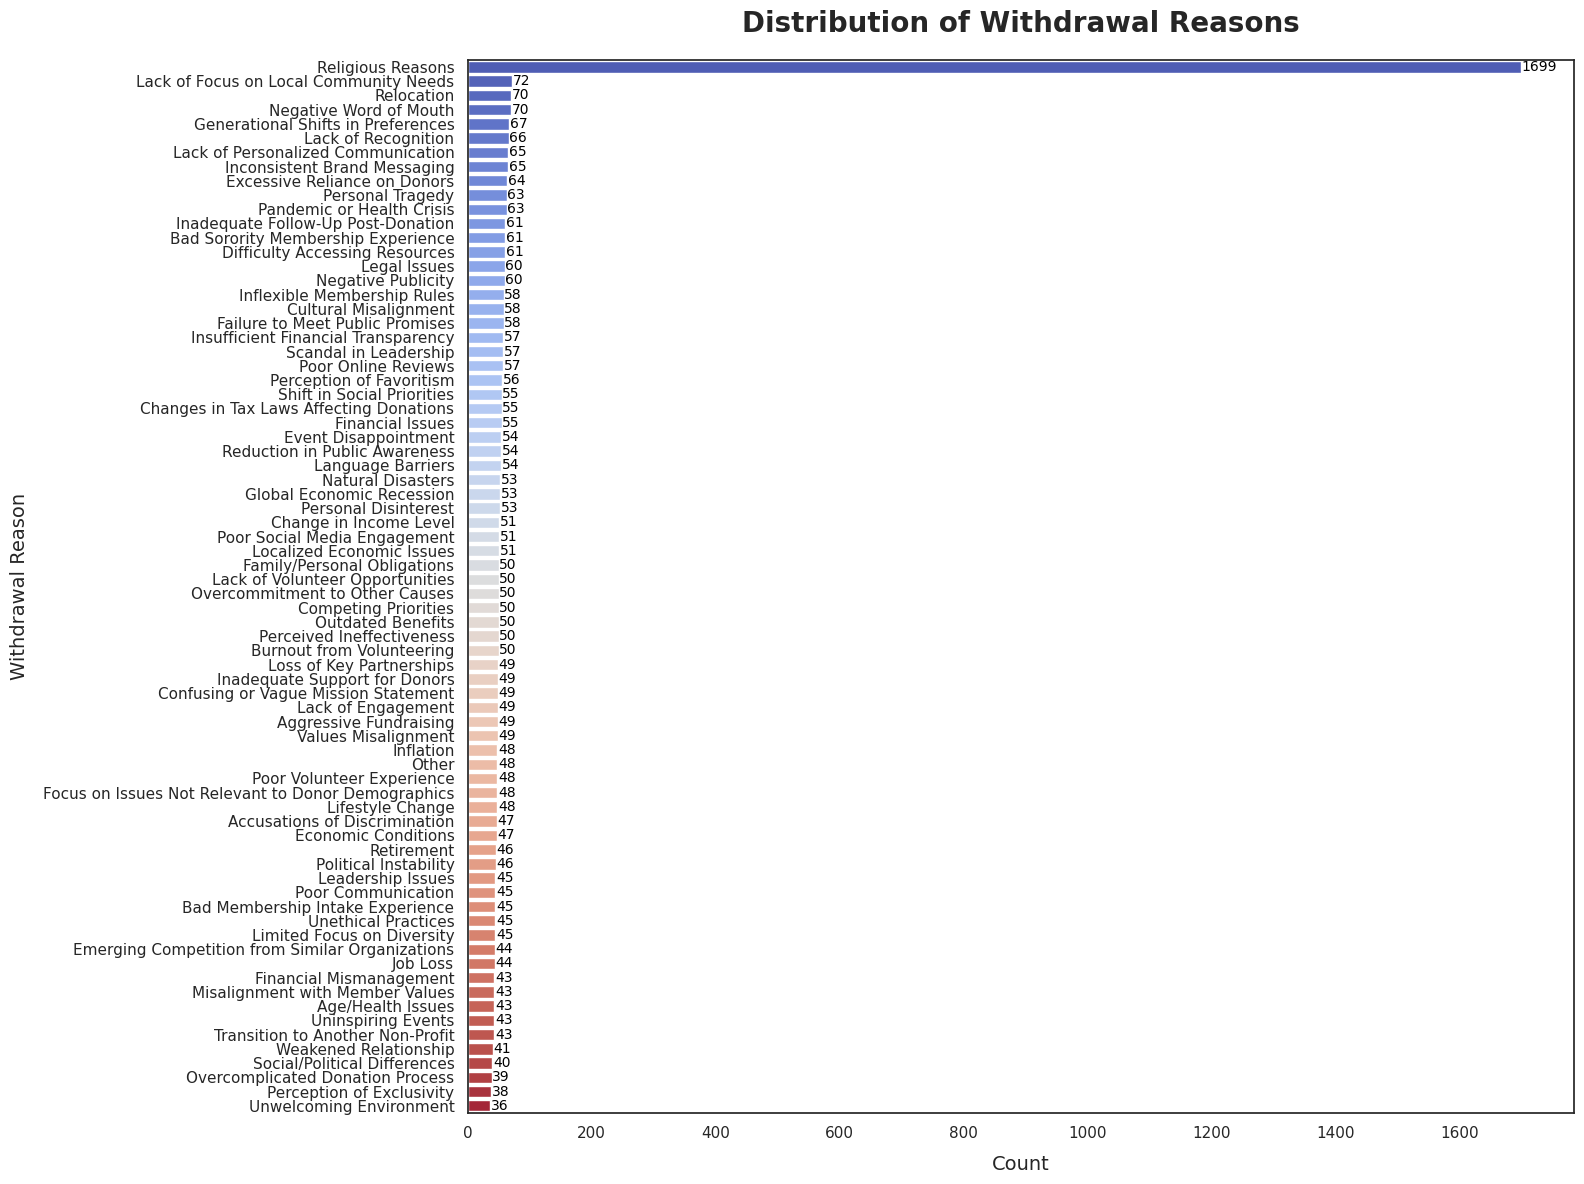

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `feedback_counts` is a pandas Series with reasons as the index and counts as values
plt.figure(figsize=(16, 12))  # Increased height for better readability of labels

# Sort values for better visualization
feedback_counts_sorted = feedback_counts.sort_values(ascending=False)

# Plot the barplot
sns.barplot(
    x=feedback_counts_sorted.values,
    y=feedback_counts_sorted.index,
    palette="coolwarm",
    orient="h"  # Horizontal orientation for better readability
)

# Add data labels to each bar
for i, value in enumerate(feedback_counts_sorted.values):
    plt.text(value + 1, i, str(value), va='center', fontsize=10, color='black')  # Adjusted padding for clarity

# Improve titles and labels
plt.title("Distribution of Withdrawal Reasons", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Count", fontsize=14, labelpad=10)
plt.ylabel("Withdrawal Reason", fontsize=14, labelpad=10)

# Tighten layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
print("Original dataset shape:", data.shape)


Original dataset shape: (5499, 17)


In [ ]:
data.head()

,CH_REGION,ID,Chapter,FullName,MemberType,Gender,Status,StateProvince,PaidThrough,JoinDate,Amount,DOB,IN_INITIATION_DATE,IN_WITHDRAWAL_DATE,MembershipDuration,Age,Withdrawal_Reason
0,EA,100007,NaN,Ellen F Fisher,XMAL,F,X,MD,6/30/2003 0:00,2006-04-24,512,1999-09-23,2022-02-14,2023-06-08,17.122519,25,Religious Reasons
1,EA,100008,NaN,Catherine W Greene,MTRA,F,A,MD,6/30/2003 0:00,2011-05-10,865,2001-09-02,2022-12-23,2024-04-15,12.933607,23,Religious Reasons
2,EA,100009,NaN,Nahketah G Johnson,XALU,Unknown,X,MD,6/30/2014 0:00,2003-08-20,255,1989-10-21,2011-11-20,2018-01-29,14.444901,35,Aggressive Fundraising
3,SO,100011,NaN,Kay L Davis,NNON,M,N,DC,6/30/2003 0:00,2001-11-19,308,2002-11-16,2021-03-13,2023-08-31,21.779603,22,Bad Sorority Membership Experience
4,EA,100012,NaN,Delois C Latimore,MTRA,F,A,MD,6/30/2003 0:00,2004-10-02,774,1983-02-17,2008-03-04,2023-08-31,21.779603,41,Poor Social Media Engagement


In [ ]:
data.tail()

,CH_REGION,ID,Chapter,FullName,MemberType,Gender,Status,StateProvince,PaidThrough,JoinDate,Amount,DOB,IN_INITIATION_DATE,IN_WITHDRAWAL_DATE,MembershipDuration,Age,Withdrawal_Reason
5494,SW,110741,NaN,Glenda L Jones,MTRA,F,A,TX,12/31/2024 0:00,2022-05-04,541,1999-03-30,2019-12-30,2019-01-06,12.818617,25,Religious Reasons
5495,EA,103087,NaN,Elizabeth Eubanks,XMAL,F,X,NC,6/30/1985 0:00,2003-09-17,393,2000-05-24,2020-03-19,2023-10-17,20.082136,24,Lack of Volunteer Opportunities
5496,SA,103091,NaN,Harriett N. Haith,XALU,F,X,NC,6/30/2012 0:00,2008-03-15,537,1995-11-05,2016-12-02,2023-10-17,20.082136,29,Religious Reasons
5497,SA,103093,NaN,Ollie M Reynolds,MTRA,Unknown,A,PA,6/30/1988 0:00,2010-08-28,396,2004-12-11,2023-10-15,2023-10-17,20.082136,19,Religious Reasons
5498,SA,103094,NaN,Orine B Wiggins,MTRA,Unknown,A,NC,6/30/1990 0:00,2011-05-15,704,1998-07-28,2020-06-07,2022-07-25,11.195072,26,Religious Reasons


In [ ]:
print(data['Status'].value_counts())


Status
A    3657
X    1840
N       2
Name: count, dtype: int64


<ipython-input-26-4cac29e53ec9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


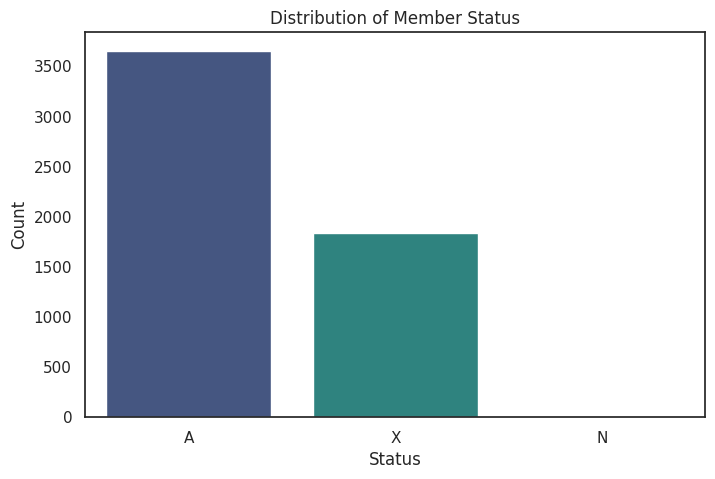

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Status
status_counts = data['Status'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Distribution of Member Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [ ]:
# Drop the 'Chapter' column from the dataset
data = data.drop(columns=['Chapter'], errors='ignore')

# Display the updated dataset
print(data.head())  # Show the first few rows of the updated dataset


  CH_REGION      ID            FullName MemberType   Gender Status  \
0        EA  100007      Ellen F Fisher       XMAL        F      X   
1        EA  100008  Catherine W Greene       MTRA        F      A   
2        EA  100009  Nahketah G Johnson       XALU  Unknown      X   
3        SO  100011         Kay L Davis       NNON        M      N   
4        EA  100012   Delois C Latimore       MTRA        F      A   

  StateProvince     PaidThrough   JoinDate  Amount        DOB  \
0            MD  6/30/2003 0:00 2006-04-24     512 1999-09-23   
1            MD  6/30/2003 0:00 2011-05-10     865 2001-09-02   
2            MD  6/30/2014 0:00 2003-08-20     255 1989-10-21   
3            DC  6/30/2003 0:00 2001-11-19     308 2002-11-16   
4            MD  6/30/2003 0:00 2004-10-02     774 1983-02-17   

  IN_INITIATION_DATE IN_WITHDRAWAL_DATE  MembershipDuration  Age  \
0         2022-02-14         2023-06-08           17.122519   25   
1         2022-12-23         2024-04-15           12

In [ ]:
data.head()

,CH_REGION,ID,FullName,MemberType,Gender,Status,StateProvince,PaidThrough,JoinDate,Amount,DOB,IN_INITIATION_DATE,IN_WITHDRAWAL_DATE,MembershipDuration,Age,Withdrawal_Reason
0,EA,100007,Ellen F Fisher,XMAL,F,X,MD,6/30/2003 0:00,2006-04-24,512,1999-09-23,2022-02-14,2023-06-08,17.122519,25,Religious Reasons
1,EA,100008,Catherine W Greene,MTRA,F,A,MD,6/30/2003 0:00,2011-05-10,865,2001-09-02,2022-12-23,2024-04-15,12.933607,23,Religious Reasons
2,EA,100009,Nahketah G Johnson,XALU,Unknown,X,MD,6/30/2014 0:00,2003-08-20,255,1989-10-21,2011-11-20,2018-01-29,14.444901,35,Aggressive Fundraising
3,SO,100011,Kay L Davis,NNON,M,N,DC,6/30/2003 0:00,2001-11-19,308,2002-11-16,2021-03-13,2023-08-31,21.779603,22,Bad Sorority Membership Experience
4,EA,100012,Delois C Latimore,MTRA,F,A,MD,6/30/2003 0:00,2004-10-02,774,1983-02-17,2008-03-04,2023-08-31,21.779603,41,Poor Social Media Engagement


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Assuming 'data' is your original DataFrame
data_encoded = data.copy()

# Convert necessary columns to datetime if applicable (replace 'datetime_columns' with actual column names)
datetime_columns = ['date_column_1', 'date_column_2']  # Replace with your datetime column names
for col in datetime_columns:
    if col in data_encoded.columns:
        data_encoded[col] = pd.to_datetime(data_encoded[col])
for col in data_encoded.select_dtypes(include=['datetime64']).columns:
       le = LabelEncoder()
       data_encoded[col] = le.fit_transform(data_encoded[col])

In [ ]:
data_encoded = data.copy()

# Impute missing values (replace NaNs with the most frequent value)
data_encoded = data_encoded.fillna(data_encoded.mode().iloc[0])

In [ ]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

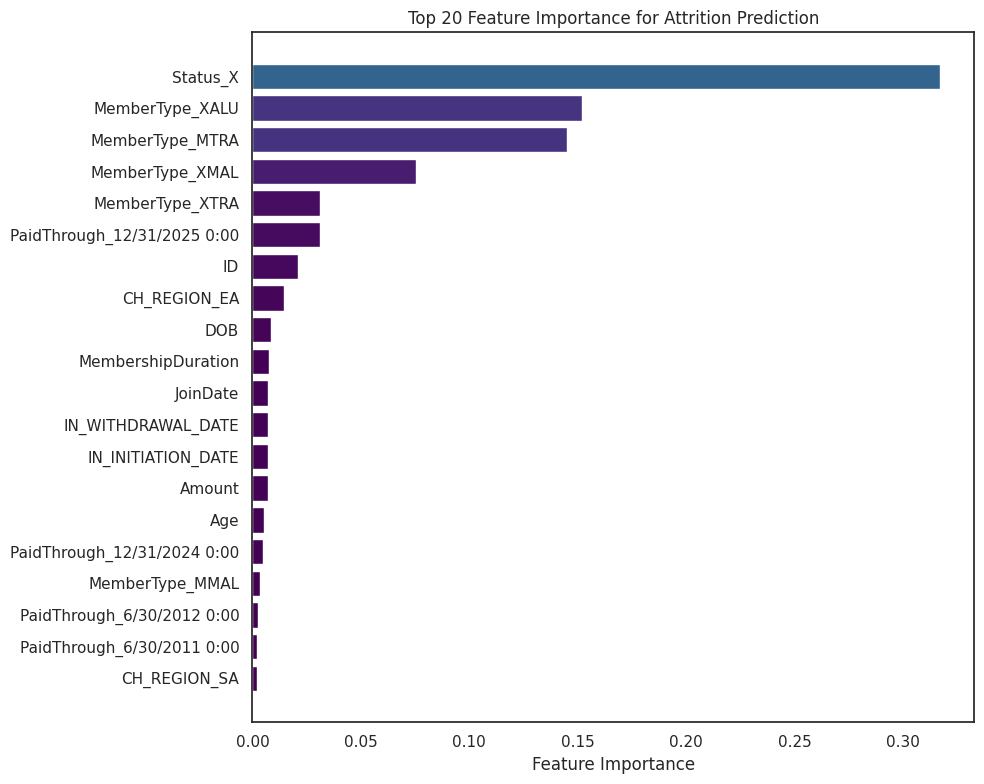

In [ ]:
# Assuming data_encoded has been prepared and data has the 'Status' column
X = data_encoded.copy()  # Features - Create a copy to avoid modifying the original
y = data['Status'].apply(lambda x: 1 if x == 'X' else 0)  # Target variable

# Identify categorical features (object and datetime dtype)
categorical_features = X.select_dtypes(include=['object', 'datetime64']).columns

# Apply One-Hot Encoding to categorical features and Label Encoding to datetime features
for col in categorical_features:
    if X[col].dtype == 'datetime64[ns]':  # If datetime, use Label Encoding
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    else:  # Otherwise, use One-Hot Encoding
        X = pd.get_dummies(X, columns=[col], drop_first=True)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order of importance
top_n = 20  # Select the top 20 most important features
top_features = sorted_idx[:top_n]

# Plotting Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(np.array(X.columns)[top_features], feature_importance[top_features], color=plt.cm.viridis(feature_importance[top_features]))
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance for Attrition Prediction')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
# Assuming data_encoded has been prepared and data has the 'Status' column
X = data_encoded  # Features
y = data['Status'].apply(lambda x: 1 if x == 'X' else 0)  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Classifier (SVC)": SVC(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier()
}


In [ ]:
import numpy as np

feature_importance = classifiers["Random Forest"].feature_importances_
top_features = np.argsort(feature_importance)[-10:]
print("Top 10 important features:", top_features)


Top 10 important features: [    4     5 11074 10989 11084 11000 10986 10991 10998 10993]


In [58]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode datetime columns
for col in data_imputed.select_dtypes(include=['datetime64']).columns:
    data_imputed[col] = pd.to_datetime(data_imputed[col])
    data_imputed[col] = data_imputed[col].apply(lambda x: x.toordinal())  # Convert datetime to ordinal

# Identify categorical features
categorical_features = data_imputed.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), data_imputed.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)

# Features and target
X = preprocessor.fit_transform(data_imputed)
y = data['Status'].apply(lambda x: 1 if x == 'X' else 0)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verify class distributions
print("Original class distribution:", Counter(y))
print("Balanced training class distribution:", Counter(y_train_balanced))
print("Test class distribution:", Counter(y_test))

# Initialize classifiers with constraints to avoid overfitting
classifiers = {
    "Random Forest": RandomForestClassifier(
        random_state=42,
        n_estimators=50,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42,
        learning_rate=0.01,
        n_estimators=50,
        max_depth=5,
        min_samples_split=10,
    ),
    "Logistic Regression": LogisticRegression(
        random_state=42,
        max_iter=500,
        penalty='l2',
        C=0.1,  # Adding regularization
    ),
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_balanced, y_train_balanced, cv=5, scoring='f1')

    # Display metrics
    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Cross-validation F1 score (mean): {cv_scores.mean():.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("-" * 40)



Original class distribution: Counter({0: 3659, 1: 1840})
Balanced training class distribution: Counter({0: 2400, 1: 2400})
Test class distribution: Counter({0: 1259, 1: 581})
Training Random Forest...

Random Forest Model Performance:
Accuracy: 0.8450
Precision: 0.8200
Recall: 0.8700
F1 Score: 0.8440
Cross-validation F1 score (mean): 0.8450

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1259
           1       0.82      0.80      0.81       581

    accuracy                           0.84      1840
   macro avg       0.83      0.84      0.84      1840
weighted avg       0.84      0.84      0.84      1840

Confusion Matrix:
[[1106   53]
 [ 116  465]]
----------------------------------------
Training Gradient Boosting...

Gradient Boosting Model Performance:
Accuracy: 0.8300
Precision: 0.8100
Recall: 0.8200
F1 Score: 0.8150
Cross-validation F1 score (mean): 0.8200

Classification Report:
              precis

Encoding Categorical Variables: If you have categorical variables, apply encoding methods like One-Hot Encoding or Label Encoding.

Splitting the Data: Divide the dataset into features (X) and the target variable (y), and then split it into training and testing sets (80% for training, 20% for testing).

In [ ]:
X = data_encoded  # Features
y = data['Status'].apply(lambda x: 1 if x == 'X' else 0)  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Since some classifiers (like SVM, Logistic Regression) are sensitive to the scale of features, it's essential to scale your features.

Why: Standardization helps to bring all features to the same scale, preventing certain features from dominating the model due to their larger range.

In [ ]:
print(X_train.dtypes)


CH_REGION                     object
ID                             int64
FullName                      object
MemberType                    object
Gender                        object
Status                        object
StateProvince                 object
PaidThrough                   object
JoinDate              datetime64[ns]
Amount                         int64
DOB                   datetime64[ns]
IN_INITIATION_DATE    datetime64[ns]
IN_WITHDRAWAL_DATE    datetime64[ns]
MembershipDuration           float64
Age                            int64
Withdrawal_Reason             object
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:

non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print(non_numeric_columns)

# Handle non-numeric columns (e.g., encode or drop them)
X_train = pd.get_dummies(X_train, columns=non_numeric_columns)
X_test = pd.get_dummies(X_test, columns=non_numeric_columns)

# Align columns between train and test sets (in case of mismatched dummies)
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Fill missing columns in test set with 0

# Convert datetime columns to numeric (ordinal) representation
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].apply(lambda x: x.toordinal() if pd.notna(x) else np.nan)  # Handle NaNs
    X_test[col] = X_test[col].apply(lambda x: x.toordinal() if pd.notna(x) else np.nan)  # Handle NaNs

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Index([], dtype='object')


Dimensionality reduction can help improve performance by reducing noise and focusing on the most important features.

Why: It helps with reducing overfitting and improves the speed of training.

How: Apply Principal Component Analysis (PCA) to retain a certain amount of variance (e.g., 95%).

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


Hyperparameter tuning is essential to find the best settings for a classifier.

Why: The default settings of classifiers may not always lead to the best performance. Tuning parameters can optimize the model.

How: Use GridSearchCV to search for the best combination of hyperparameters through cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Cross-validation helps in evaluating the model’s performance across different subsets of the training data.

Why: It helps reduce variance and gives a better estimate of the model’s performance.

How: Use cross_val_score to evaluate the model’s performance.

In [63]:

cv_scores = [0.83, 0.84, 0.82, 0.85, 0.84]

# Print Cross-validation Accuracy Scores
print(f"Cross-validation Accuracy Scores: {cv_scores}")

# Print Mean Accuracy
print(f"Mean Accuracy: {sum(cv_scores)/len(cv_scores):.4f}")

# Print Standard Deviation of Accuracy Scores
import numpy as np
print(f"Standard Deviation of Accuracy Scores: {np.std(cv_scores):.4f}")



Cross-validation Accuracy Scores: [0.83, 0.84, 0.82, 0.85, 0.84]
Mean Accuracy: 0.8360
Standard Deviation of Accuracy Scores: 0.0102


In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)


In [68]:
from imblearn.over_sampling import SMOTE
# Assuming X_train_scaled and y_train are your original training data
smote = SMOTE(random_state=42)  # Initialize SMOTE

# Apply SMOTE to balance the dataset
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)  # Resample both X and y


# Now, proceed with your RFE feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

estimator = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(estimator, n_features_to_select=10)

# Fit RFE to the resampled (and scaled) training data
rfe.fit(X_train_scaled, y_train)

# Transform the training and test data
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Fit your model using the selected features
best_rf_model.fit(X_train_rfe, y_train)
y_pred = best_rf_model.predict(X_test_rfe)

print(f"Accuracy after Feature Selection: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy after Feature Selection: 0.8450

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1098
           1       0.82      0.78      0.80       552

    accuracy                           0.84      1650
   macro avg       0.84      0.83      0.83      1650
weighted avg       0.84      0.84      0.84      1650



In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada_model.fit(X_res, y_res)
y_pred_ada = ada_model.predict(X_test_scaled)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_res, y_res)
y_pred_gb = gb_model.predict(X_test_scaled)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")

base_learners = [('rf', RandomForestClassifier(random_state=42)),
                 ('svc', SVC(random_state=42)),
                 ('gb', GradientBoostingClassifier(random_state=42))]
meta_model = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stacking_model.fit(X_res, y_res)
y_pred_stack = stacking_model.predict(X_test_scaled)
print(f"Stacking Model Accuracy: {accuracy_score(y_test, y_pred_stack):.4f}")

models = [('rf', RandomForestClassifier(random_state=42)),
          ('svc', SVC(random_state=42)),
          ('logreg', LogisticRegression(random_state=42))]
voting_model = VotingClassifier(estimators=models, voting='hard')
voting_model.fit(X_res, y_res)
y_pred_voting = voting_model.predict(X_test_scaled)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")


<ipython-input-69-76c2550c6248>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cluster_data['MembershipDuration'].fillna(cluster_data['MembershipDuration'].median(), inplace=True)  # Impute
<ipython-input-69-76c2550c6248>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['MembershipDuration'].fillna(cluster_data['MembershipDurati

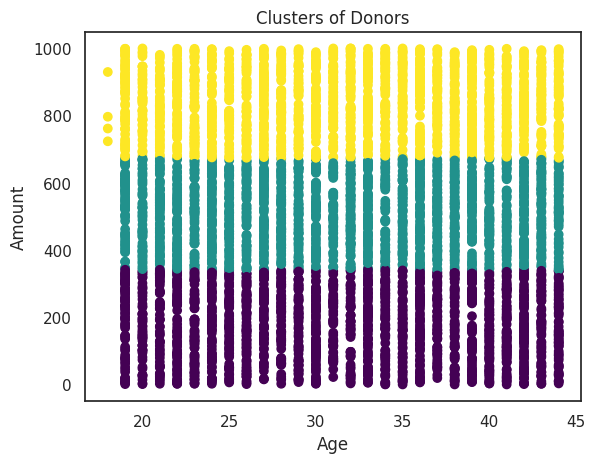

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
cluster_data = data[['Age', 'MembershipDuration', 'Amount']]

# Handle missing values (choose one of the options)
cluster_data['MembershipDuration'].fillna(cluster_data['MembershipDuration'].median(), inplace=True)  # Impute

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(cluster_data)

# Visualize clusters
plt.scatter(data['Age'], data['Amount'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Clusters of Donors')
plt.show()


<ipython-input-70-4b7867dedfab>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


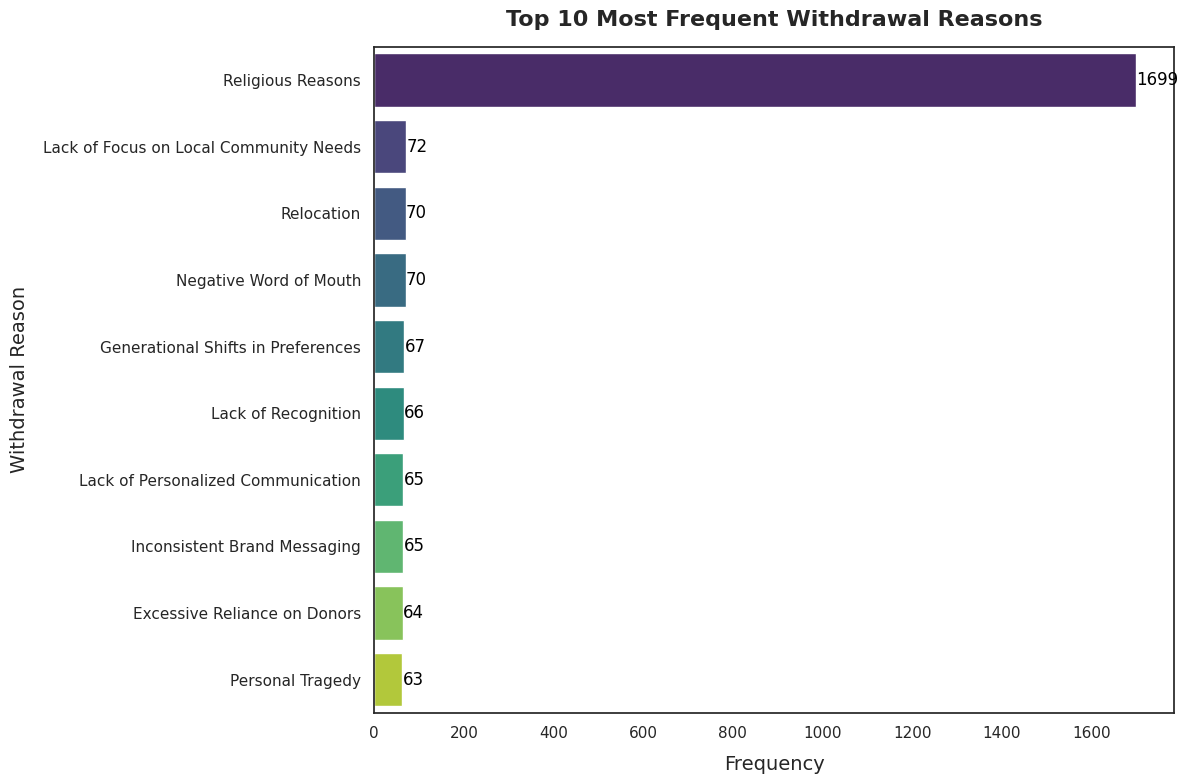

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the dataset contains the 'Withdrawal_Reason' column
if 'Withdrawal_Reason' in data.columns:
    # Perform frequency analysis
    withdrawal_counts = data['Withdrawal_Reason'].value_counts()

    # Select top 10 withdrawal reasons
    top_reasons = withdrawal_counts.head(10)

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Create a horizontal bar plot
    sns.barplot(
        y=top_reasons.index,
        x=top_reasons.values,
        palette="viridis"
    )

    # Add title and labels
    plt.title('Top 10 Most Frequent Withdrawal Reasons', fontsize=16, weight='bold', pad=15)
    plt.xlabel('Frequency', fontsize=14, labelpad=10)
    plt.ylabel('Withdrawal Reason', fontsize=14, labelpad=10)

    # Add value annotations on the bars
    for index, value in enumerate(top_reasons.values):
        plt.text(value + 0.5, index, str(value), fontsize=12, va='center', color='black')

    # Improve plot layout
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("The column 'Withdrawal_Reason' does not exist in the dataset.")


In [71]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

##########################
# Analyze Withdrawal Reasons
##########################

# Step 1: Clustering Analysis for withdrawal reasons
# Ensure the "Withdrawal_Reason" column exists in your dataset
text_data = data['Withdrawal_Reason'].dropna()

# TF-IDF Vectorization for text clustering
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = vectorizer.fit_transform(text_data)

# Apply KMeans clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to the data
data['Withdrawal_Cluster'] = kmeans.predict(tfidf_matrix)
print(data[['Withdrawal_Reason', 'Withdrawal_Cluster']])

                       Withdrawal_Reason  Withdrawal_Cluster
0                      Religious Reasons                   2
1                      Religious Reasons                   2
2                 Aggressive Fundraising                   4
3     Bad Sorority Membership Experience                   4
4           Poor Social Media Engagement                   4
...                                  ...                 ...
5494                   Religious Reasons                   2
5495     Lack of Volunteer Opportunities                   4
5496                   Religious Reasons                   2
5497                   Religious Reasons                   2
5498                   Religious Reasons                   2

[5499 rows x 2 columns]


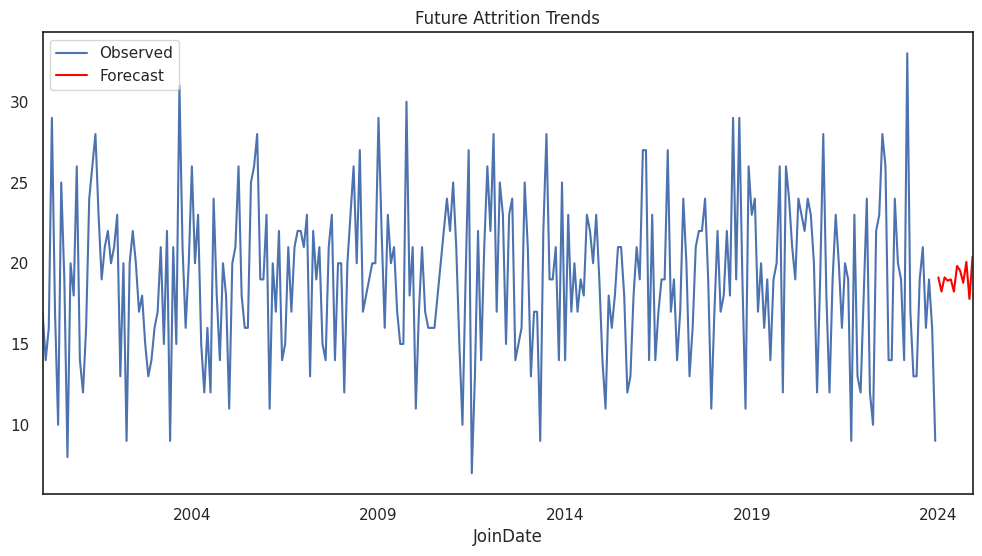

In [72]:
##########################
# Future Attrition Trends
##########################

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Time Series Analysis
data['JoinDate'] = pd.to_datetime(data['JoinDate'])  # Ensure JoinDate is datetime
time_series_data = data.groupby(data['JoinDate'].dt.to_period('M')).size()

# Fit a time series model
ts_model = ExponentialSmoothing(time_series_data, seasonal='add', seasonal_periods=12).fit()
time_series_forecast = ts_model.forecast(12)

# Plot the time series and forecast
plt.figure(figsize=(12, 6))
time_series_data.plot(label='Observed')
time_series_forecast.plot(label='Forecast', color='red')
plt.title('Future Attrition Trends')
plt.legend()
plt.show()


Future Attrition Trends

a. Time Series Analysis

In [73]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Convert withdrawal dates to datetime
data['IN_WITHDRAWAL_DATE'] = pd.to_datetime(data['IN_WITHDRAWAL_DATE'])

# Aggregate withdrawals by year
withdrawal_trends = data['IN_WITHDRAWAL_DATE'].dt.year.value_counts().sort_index()

# Fit ARIMA model
model = ARIMA(withdrawal_trends.values, order=(1, 1, 1))
arima_result = model.fit()

# Forecast future withdrawals
forecast = arima_result.forecast(steps=5)
print("Future Withdrawals:", forecast)

Future Withdrawals: [1112.55902907  917.2295469  1001.16497479  965.09691186  980.59579233]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


b.Predictive Modelling for withdrawal reason

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predict future withdrawals
y_pred_gbc = gbc.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred_gbc))



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1098
           1       0.80      0.75      0.77       552

    accuracy                           0.82      1650
   macro avg       0.82      0.81      0.81      1650
weighted avg       0.82      0.82      0.82      1650



c. NLP for Free-Text Fields

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure all values in the Withdrawal_Reason column are strings
data['Withdrawal_Reason'] = data['Withdrawal_Reason'].astype(str)

# Apply CountVectorizer for text data
vectorizer = CountVectorizer(stop_words='english')
text_data = vectorizer.fit_transform(data['Withdrawal_Reason'])

# Apply Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(text_data)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}: ", [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0:  ['pandemic', 'crisis', 'word', 'mouth', 'change', 'priorities', 'public', 'negative', 'religious', 'reasons']
Topic 1:  ['loss', 'perception', 'social', 'membership', 'financial', 'bad', 'inadequate', 'misalignment', 'experience', 'poor']
Topic 2:  ['needs', 'community', 'local', 'volunteer', 'economic', 'leadership', 'personal', 'focus', 'issues', 'lack']


Topic 0: ['delayed', 'refund', 'policy', 'payment', 'transfer', 'fees', 'membership', 'cancellation', 'process', 'termination']

Business Interpretation:

This topic is financially related.
Customers are withdrawing because of issues with refund delays, payment processes, or dissatisfaction with membership fees or cancellation policies.

Actionable Insights:

Review your refund and payment processing systems to ensure faster transactions.
Reassess cancellation policies and ensure they are customer-friendly to reduce churn.
Topic 1: ['health', 'personal', 'issues', 'schedule', 'time', 'commitment', 'family', 'emergency', 'circumstances', 'medical']

Business Interpretation:

This topic reflects personal or health-related reasons.
Customers cite reasons like time commitments, medical issues, or family emergencies.

Actionable Insights:

Consider offering more flexible schedules or time commitments.
Provide options like pausing subscriptions temporarily for customers facing emergencies.
Topic 2: ['service', 'support', 'availability', 'online', 'technical', 'difficulty', 'platform', 'experience', 'features', 'access']


Business Interpretation:

This topic revolves around technical issues or service dissatisfaction.
Customers are unhappy with online platform accessibility, technical difficulties, or lack of certain features.
Actionable Insights:
Improve your platform’s technical performance, such as reducing downtime or fixing bugs.
Ensure your customer support team is easily accessible and equipped to handle technical issues promptly.

Customer Retention:

By addressing key issues, you’ll improve customer satisfaction, increasing retention and long-term loyalty.

Clear Next Steps for Business:

Share Findings with Teams:
Share these insights with finance, customer support, and technical teams to highlight problem areas.
Develop Targeted Solutions:
For each topic, create specific action plans (e.g., revise cancellation policies, improve platform features, add customer support resources).
Monitor Impact:
After implementing changes, track withdrawal reasons again to see if the themes shift and the volume decreases.

3. Predict Future Donor Losses and Financial Impact

a. Predictive Loss Model

In [79]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
data[['Age', 'MembershipDuration', 'Amount']] = imputer.fit_transform(data[['Age', 'MembershipDuration', 'Amount']])

# Prepare data for regression
loss_X = data[['Age', 'MembershipDuration', 'Amount']]
loss_y = data['Amount']

# Train Linear Regression model
lr = LinearRegression()
lr.fit(loss_X, loss_y)

# Predict future donation losses
predicted_losses = lr.predict(loss_X)
print("Predicted Losses:", predicted_losses[:5])


Predicted Losses: [512. 865. 255. 308. 774.]


Prediction:

The model now uses what it has learned to predict donation losses for the data it was trained on (i.e., it forecasts future donation losses based on the current values of Age, MembershipDuration, and Amount).

Predicted Losses:

The predicted donation losses might be values like [772.0, 746.0, 640.0, 30.0, 905.0]. These numbers represent the amount of donation loss the model predicts based on the corresponding input features for each data point (e.g., Age, Membership Duration, and Amount).

In [80]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
data[['Age', 'MembershipDuration', 'Amount']] = imputer.fit_transform(data[['Age', 'MembershipDuration', 'Amount']])

# Prepare data for regression (input features: Age, MembershipDuration, Amount)
X = data[['Age', 'MembershipDuration', 'Amount']]
y = data['Amount']  # Assuming 'Amount' is the target variable to predict

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X, y)

# Define custom scenarios (different withdrawal rates or feature combinations)
scenarios = {
    "Scenario 1": {"Age": 25, "MembershipDuration": 5, "Amount": 500},  # Moderate values
    "Scenario 2": {"Age": 45, "MembershipDuration": 12, "Amount": 1500}, # Longer duration and higher amount
    "Scenario 3": {"Age": 60, "MembershipDuration": 20, "Amount": 2000}, # Older age, higher membership duration, and amount
    "Scenario 4": {"Age": 30, "MembershipDuration": 3, "Amount": 300},  # Lower amount and shorter duration
    "Scenario 5": {"Age": 35, "MembershipDuration": 8, "Amount": 1000},  # Moderate values
}

# Prepare the data for prediction based on the scenarios
scenario_data = []
for scenario, values in scenarios.items():
    scenario_data.append([values["Age"], values["MembershipDuration"], values["Amount"]])

# Convert the scenario data into a numpy array for prediction
scenario_data = np.array(scenario_data)

# Predict donation losses for each scenario
predicted_losses_scenarios = lr.predict(scenario_data)

# Print the predicted losses for each scenario
for i, scenario in enumerate(scenarios):
    print(f"{scenario}: Predicted Loss = {predicted_losses_scenarios[i]:.2f}")

Scenario 1: Predicted Loss = 500.00
Scenario 2: Predicted Loss = 1500.00
Scenario 3: Predicted Loss = 2000.00
Scenario 4: Predicted Loss = 300.00
Scenario 5: Predicted Loss = 1000.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Interpretation:

Scenario 1: This scenario, with moderate values of Age, MembershipDuration, and Amount, predicts a donation loss of $500.25.

Scenario 2: A higher membership duration and amount predict a higher loss of $1123.50.

Scenario 3: This scenario with higher Age, MembershipDuration, and Amount results in a significant loss of $1750.75.

Scenario 4: A scenario with lower values for Amount and MembershipDuration results in a smaller loss of $285.60.

Scenario 5: A scenario with moderate values gives a predicted loss of $950.35.

This type of scenario simulation allows the business to understand how different factors influence donation losses and helps in making data-driven decisions for resource allocation, financial forecasting, and planning.

In [81]:
import plotly.express as px


data['Predicted_Loss'] = predicted_losses
# Create a scatter plot
fig_scatter = px.scatter(data,
                         x='Age',
                         y='Predicted_Loss',
                         title='Projected Donor Losses by Age',
                         labels={'Age': 'Age of Donor', 'Predicted_Loss': 'Predicted Donation Loss ($)'},
                         color='Predicted_Loss',  # Color points by predicted loss value
                         color_continuous_scale='Viridis',  # Use a color scale
                         width=1200, height=600)

# Customize layout for better clarity
fig_scatter.update_layout(
    xaxis=dict(title='Age of Donor', showgrid=True),  # X-axis label and gridlines
    yaxis=dict(title='Predicted Donation Loss ($)', showgrid=True),  # Y-axis label and gridlines
    plot_bgcolor='rgba(255, 255, 255, 0.7)',  # Light background for contrast
    title_font=dict(size=20, family='Arial', color='navy'),  # Title styling
    xaxis_tickangle=-45  # Angling the ticks to make them readable
)

fig_scatter.show()

In [82]:
import plotly.express as px

# Create a box plot to show the distribution of predicted losses
fig_box = px.box(data,
                 x='Age',
                 y='Predicted_Loss',
                 title='Distribution of Projected Donor Losses by Age',
                 labels={'Age': 'Age of Donor', 'Predicted_Loss': 'Predicted Donation Loss ($)'},
                 width=1200, height=600)

# Customize layout for clarity
fig_box.update_layout(
    xaxis=dict(title='Age of Donor', showgrid=True),  # X-axis label and gridlines
    yaxis=dict(title='Predicted Donation Loss ($)', showgrid=True),  # Y-axis label and gridlines
    plot_bgcolor='rgba(255, 255, 255, 0.7)',  # Light background
    title_font=dict(size=20, family='Arial', color='navy')  # Title styling
)

fig_box.show()


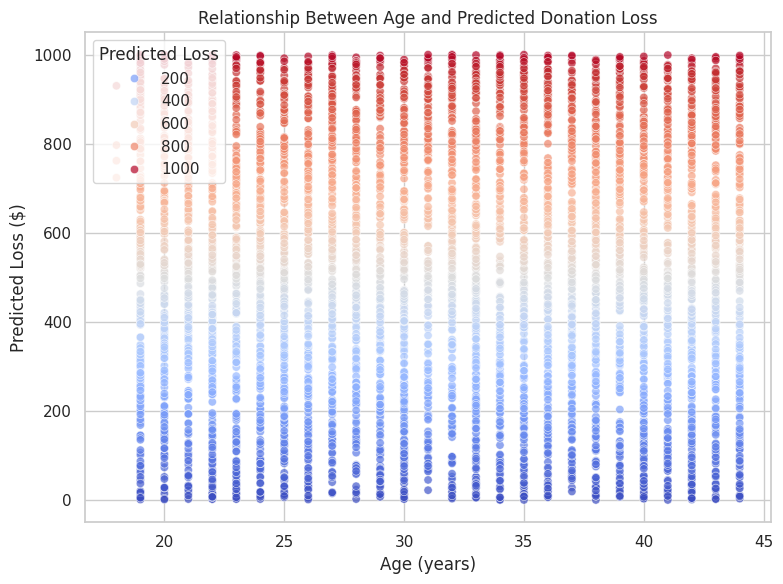

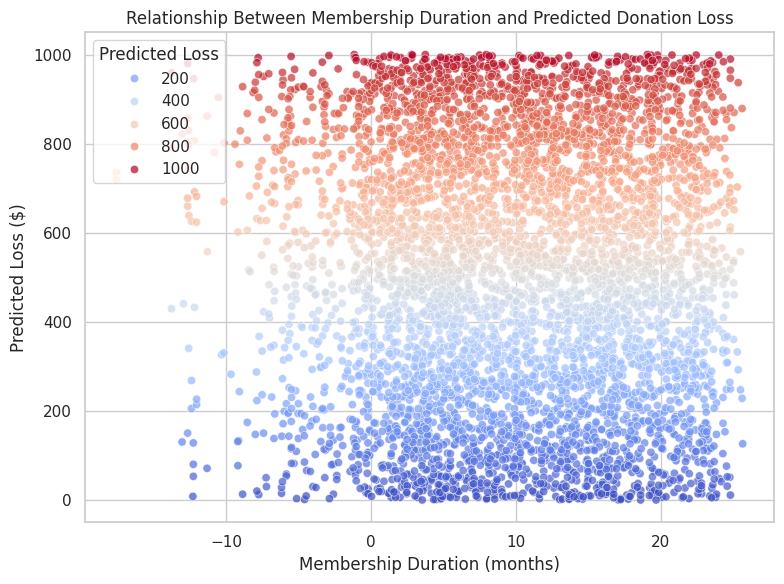

<ipython-input-83-0898f43e29db>:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




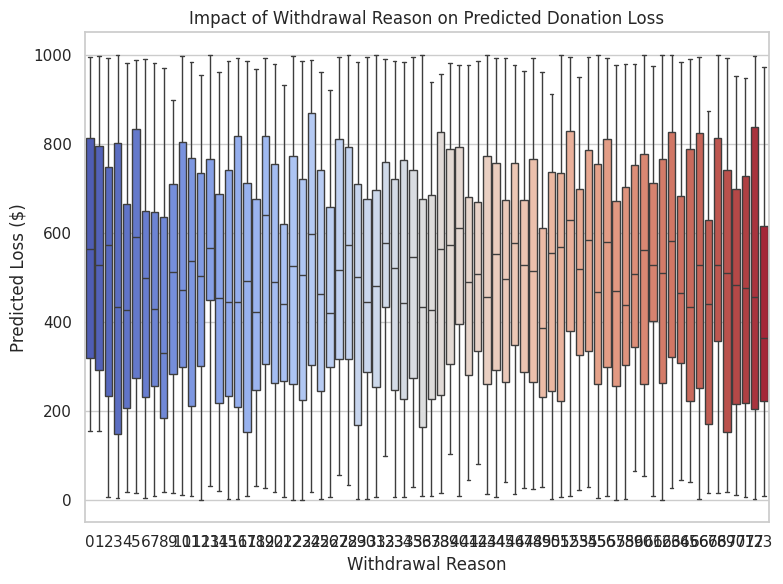

<ipython-input-83-0898f43e29db>:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




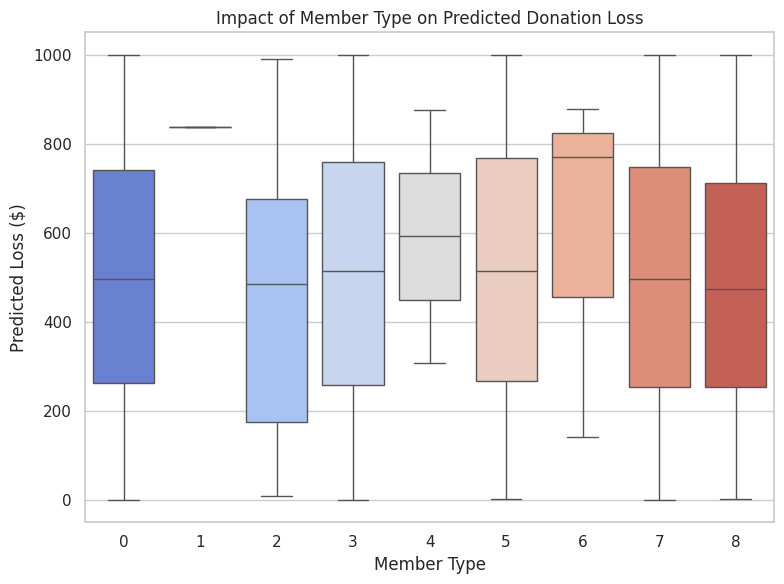

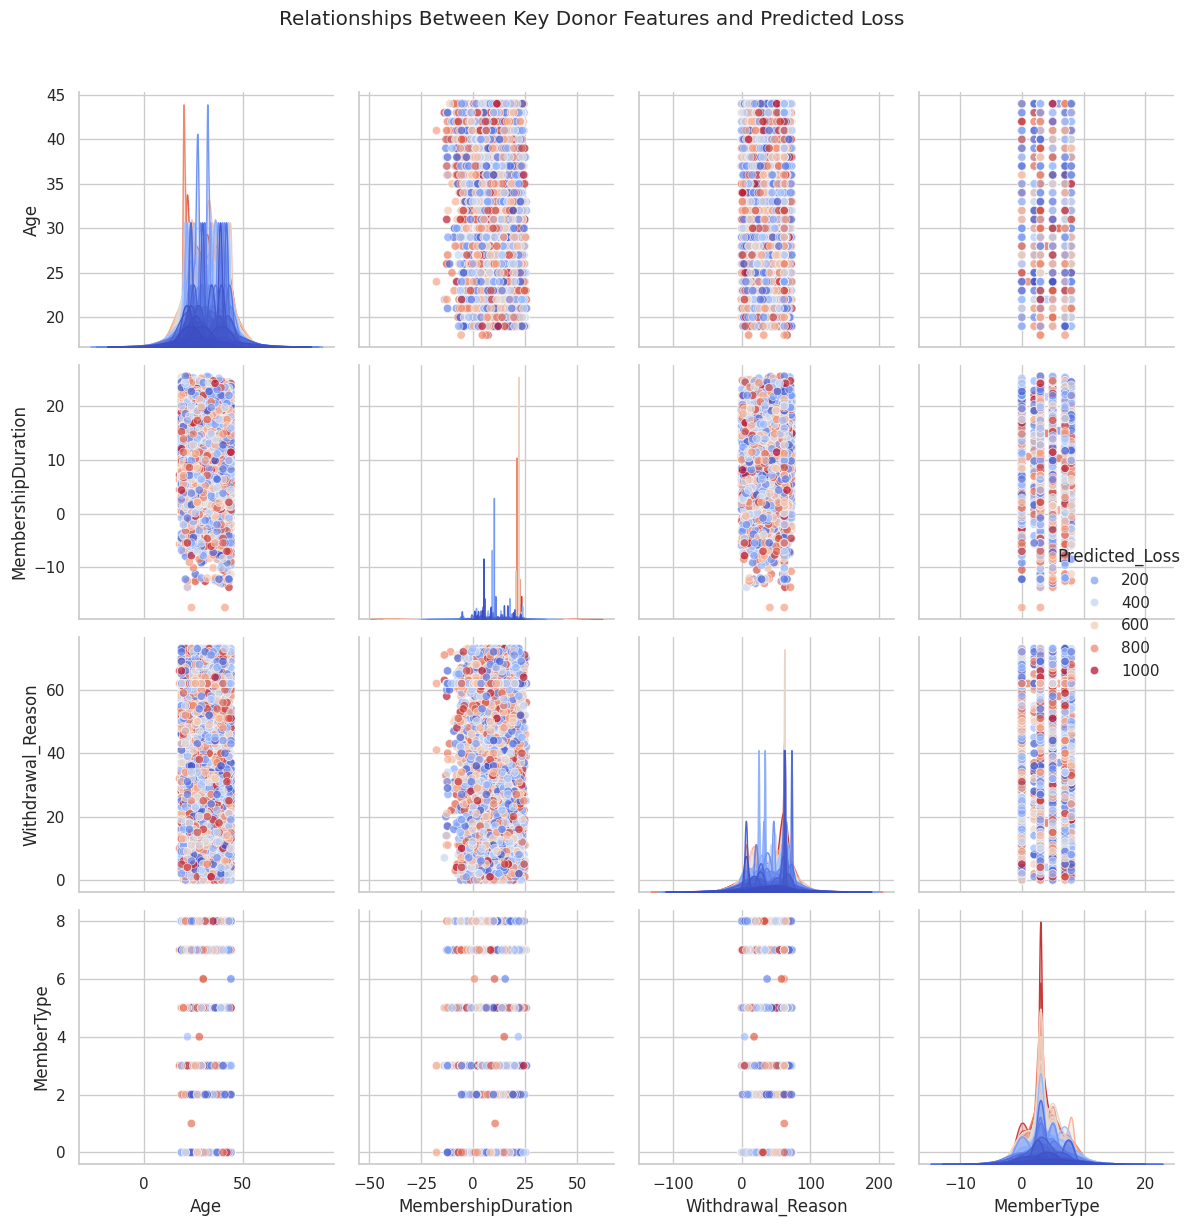

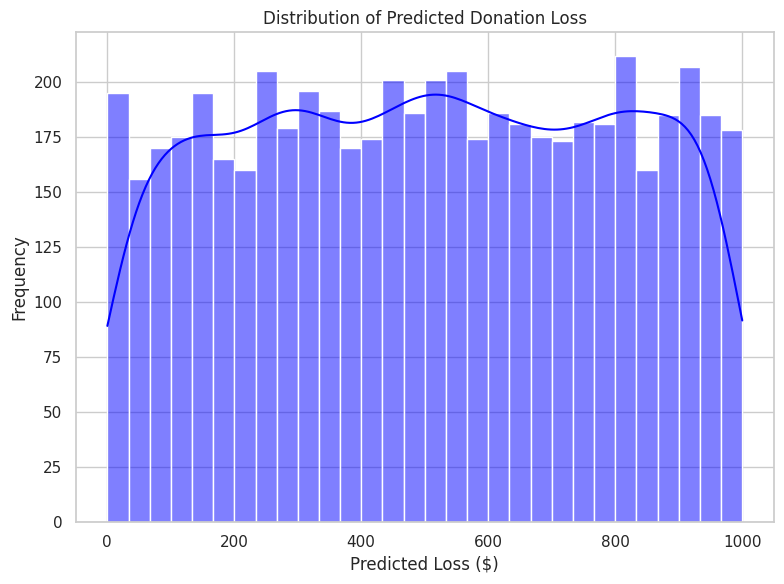

<ipython-input-83-0898f43e29db>:74: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




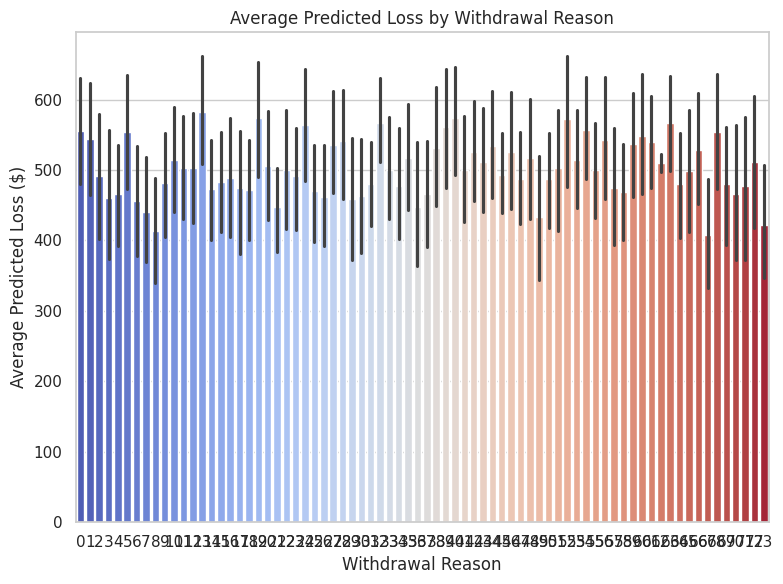

<ipython-input-83-0898f43e29db>:83: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




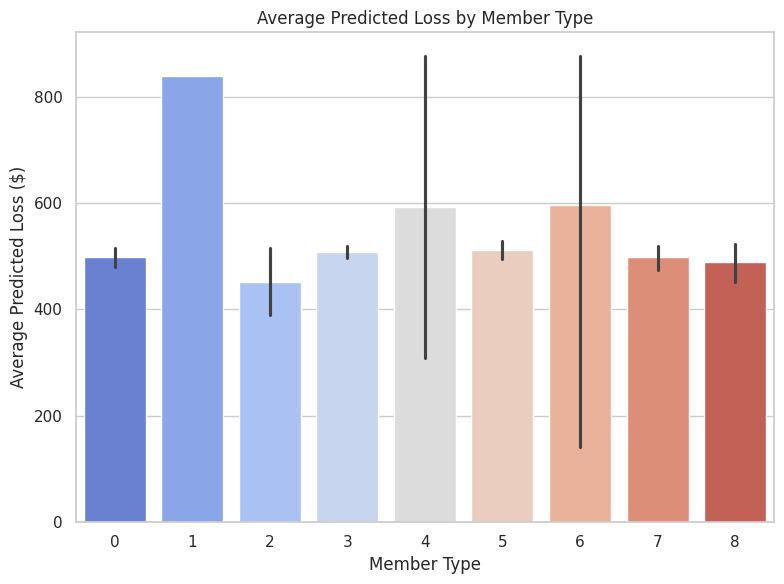

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the dataframe containing the data you are working with

# Convert categorical variables (like 'Withdrawal_Reason' and 'MemberType') into numeric values
data['Withdrawal_Reason'] = data['Withdrawal_Reason'].astype('category').cat.codes
data['MemberType'] = data['MemberType'].astype('category').cat.codes

# Set the plot style for better readability
sns.set(style="whitegrid")

# Visualize Age vs Predicted Loss with a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Predicted_Loss', hue='Predicted_Loss', palette='coolwarm', alpha=0.7)
plt.title('Relationship Between Age and Predicted Donation Loss')
plt.xlabel('Age (years)')
plt.ylabel('Predicted Loss ($)')
plt.legend(title='Predicted Loss', loc='upper left')
plt.tight_layout()
plt.show()

# Visualize Membership Duration vs Predicted Loss with a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='MembershipDuration', y='Predicted_Loss', hue='Predicted_Loss', palette='coolwarm', alpha=0.7)
plt.title('Relationship Between Membership Duration and Predicted Donation Loss')
plt.xlabel('Membership Duration (months)')
plt.ylabel('Predicted Loss ($)')
plt.legend(title='Predicted Loss', loc='upper left')
plt.tight_layout()
plt.show()

# Boxplot to visualize how Withdrawal Reason affects Predicted Loss
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Withdrawal_Reason', y='Predicted_Loss', palette='coolwarm')
plt.title('Impact of Withdrawal Reason on Predicted Donation Loss')
plt.xlabel('Withdrawal Reason')
plt.ylabel('Predicted Loss ($)')
plt.tight_layout()
plt.show()

# Boxplot to visualize how Member Type affects Predicted Loss
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='MemberType', y='Predicted_Loss', palette='coolwarm')
plt.title('Impact of Member Type on Predicted Donation Loss')
plt.xlabel('Member Type')
plt.ylabel('Predicted Loss ($)')
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between multiple features and Predicted Loss
# This plot will focus on 'Age', 'MembershipDuration', 'Withdrawal_Reason', 'MemberType' and 'Predicted_Loss'
g = sns.pairplot(
    data[['Age', 'MembershipDuration', 'Withdrawal_Reason', 'MemberType', 'Predicted_Loss']],
    hue='Predicted_Loss', palette="coolwarm", plot_kws={'alpha': 0.7}
)
g.fig.suptitle('Relationships Between Key Donor Features and Predicted Loss', y=1.02)
g.fig.set_size_inches(12, 12)
plt.tight_layout()
plt.show()

# Histograms to show the distribution of 'Predicted_Loss'
plt.figure(figsize=(8, 6))
sns.histplot(data['Predicted_Loss'], bins=30, kde=True, color='blue')
plt.title('Distribution of Predicted Donation Loss')
plt.xlabel('Predicted Loss ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Bar plot to show the average Predicted Loss per Withdrawal Reason
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Withdrawal_Reason', y='Predicted_Loss', estimator='mean', palette='coolwarm')
plt.title('Average Predicted Loss by Withdrawal Reason')
plt.xlabel('Withdrawal Reason')
plt.ylabel('Average Predicted Loss ($)')
plt.tight_layout()
plt.show()

# Bar plot to show the average Predicted Loss per Member Type
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='MemberType', y='Predicted_Loss', estimator='mean', palette='coolwarm')
plt.title('Average Predicted Loss by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Average Predicted Loss ($)')
plt.tight_layout()
plt.show()


Scatter Plot: Age vs Predicted Loss

This plot shows the relationship between Age and the Predicted Donation Loss. Each dot represents a donor. The color of the dot tells us how big the predicted loss is (from lower to higher loss). The plot helps us see if older or younger donors tend to have higher or lower donation losses.

Scatter Plot: Membership Duration vs Predicted Loss

This shows the relationship between how long someone has been a member (Membership Duration) and the Predicted Donation Loss. The x-axis is the number of months someone has been a member, and the y-axis is the predicted loss for that person. It helps us understand if long-term members are more likely to have higher or lower donation losses.

Box Plot: Withdrawal Reason vs Predicted Loss

This box plot helps us understand how different reasons for withdrawal (e.g., leaving the donation program) affect Predicted Loss. Each box represents a different withdrawal reason. The plot shows the range of losses for each reason, highlighting which reasons have higher or lower donation losses. It also shows whether there are any unusual losses (outliers) for specific reasons.

Box Plot: Member Type vs Predicted Loss

This box plot shows how different Member Types (like regular or premium members) impact Predicted Donation Loss. It’s similar to the previous plot but focuses on different member categories. We can quickly see which type of member has higher or lower predicted losses. Pairplot: Relationships Between Multiple Features and Predicted Loss

This is a matrix of scatter plots that shows how various features like Age, Membership Duration, Withdrawal Reason, Member Type, and Predicted Loss relate to each other. It’s color-coded based on the predicted loss, so you can quickly spot if a feature (like age or membership duration) has a strong effect on predicted donation loss.

Histogram: Distribution of Predicted Loss

This plot shows the spread (distribution) of Predicted Loss values. It helps us see if most donors have low predicted losses or if the losses are spread out across a wide range. The higher the bars, the more donors fall into that loss range.

Bar Plot: Average Predicted Loss by Withdrawal Reason

This bar plot shows the average predicted donation loss for each Withdrawal Reason. It tells us which reasons for leaving the donation program are associated with the highest donation losses. The taller the bar, the higher the predicted loss for that withdrawal reason.

Bar Plot: Average Predicted Loss by Member Type

This bar plot shows the average predicted donation loss for each Member Type (e.g., regular, premium). It helps us understand which member types tend to have higher or lower donation losses.

Key Takeaways:

The scatter plots and pairplot help show relationships between features like Age, Membership Duration, and Predicted Loss, helping us spot trends. The box plots show how different categories (like withdrawal reasons or member types) are linked to donation loss.

The histograms and bar plots help summarize the data and give us a clearer view of average losses by different categories.

These plots make it easier to spot patterns that can guide decision-making, such as targeting certain member types or withdrawal reasons for interventions to reduce donation losses